In [1]:
import torch
import numpy as np
from hmc_u1 import HMC_U1
from hmc_u1_ft import HMC_U1_FT
from cnn_model import FieldTransformation
from utils import hmc_summary


In [2]:
# Parameters
lattice_size = 16
volume = lattice_size ** 2
beta = 5
n_thermalization_steps = 200
n_steps = 50
step_size = 0.1
n_iterations = 512

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

# Set default type
torch.set_default_dtype(torch.float32)

### No Field Transformation

>>> No Field Transformation HMC Simulation: 


Thermalizing:  15%|█▌        | 30/200 [00:00<00:01, 91.84it/s]

Running HMC: 100%|██████████| 512/512 [00:05<00:00, 90.59it/s]


>>> Simulation completed


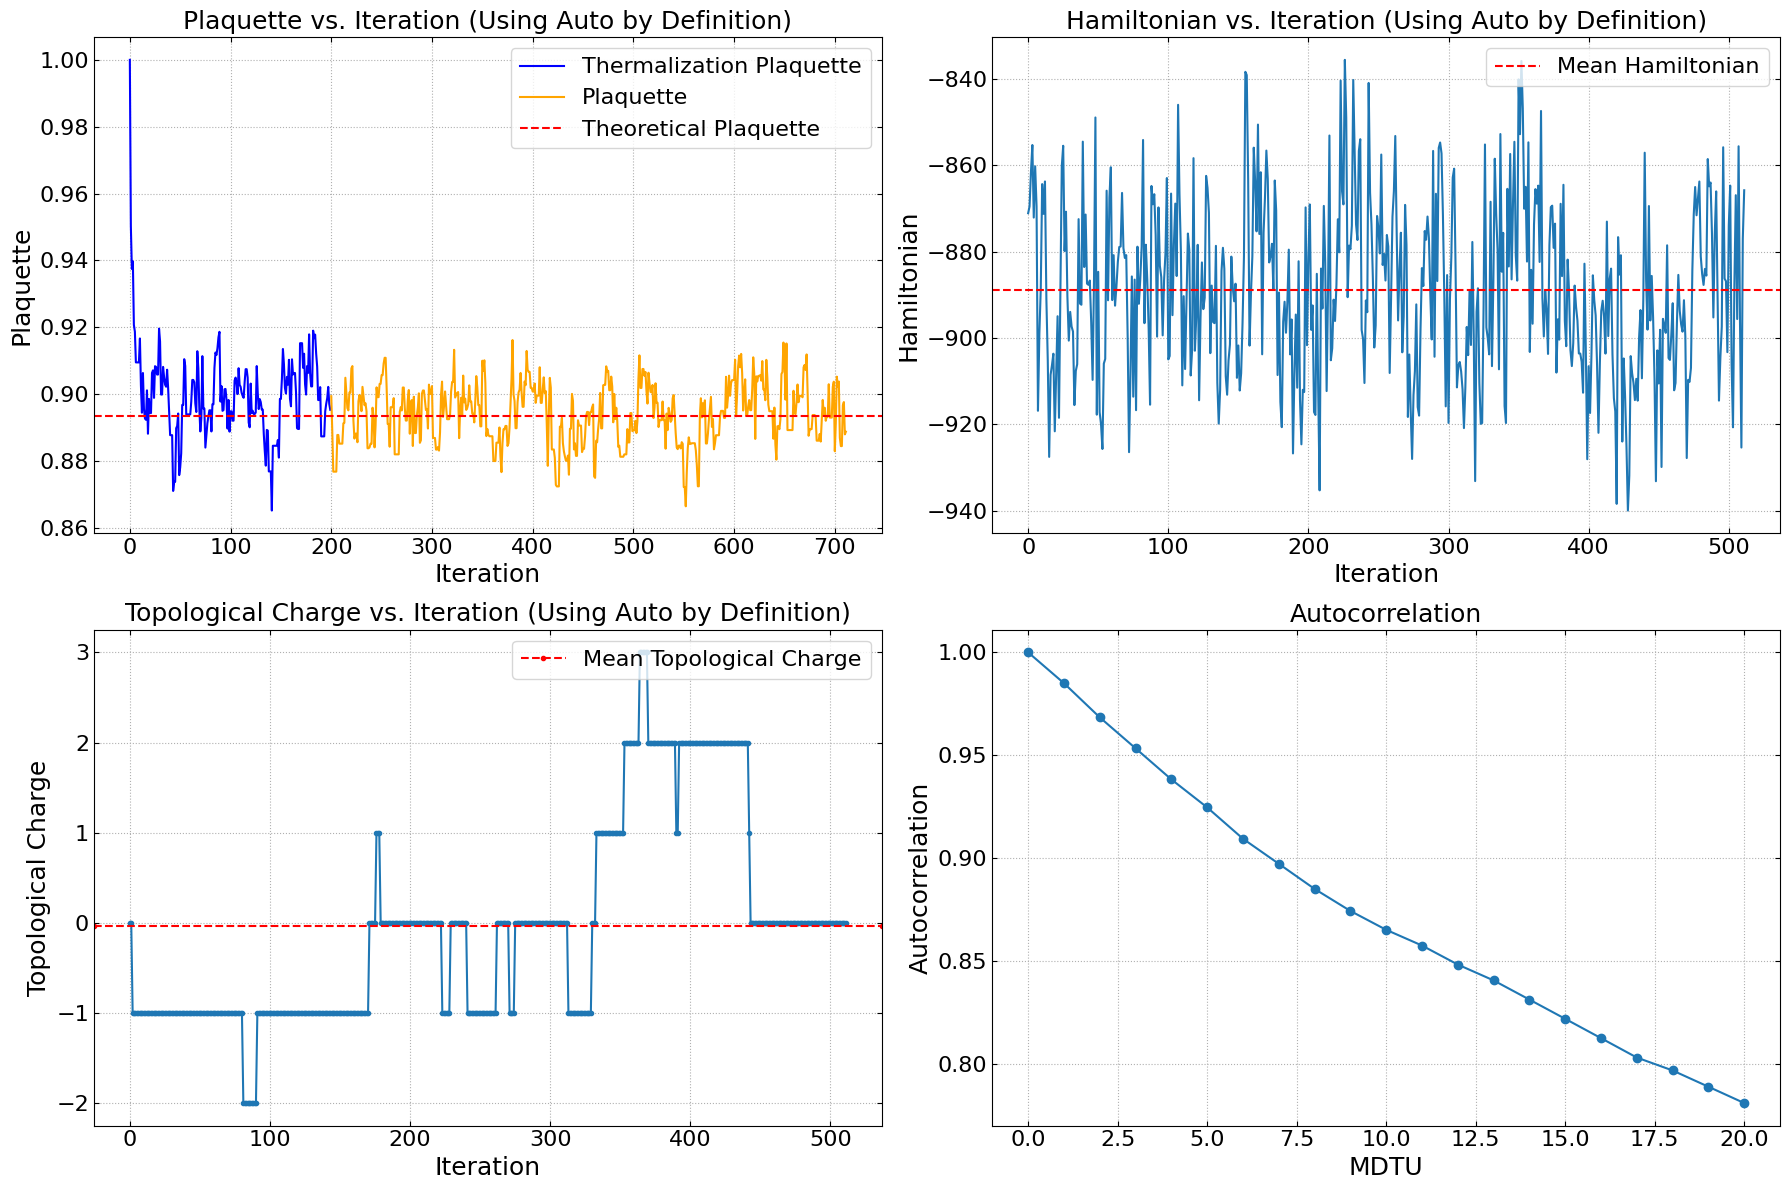

>>> Theoretical plaquette:  0.8933831370440852
>>> Mean plaq:  0.8940275878412649
>>> Std of mean plaq:  0.00038708332705635545
Thermalization acceptance rate: 0.8150
Acceptance rate: 0.7637


In [3]:
print(">>> No Field Transformation HMC Simulation: ")

# Initialize HMC
hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size, device=device)

# Thermalize the system
theta_thermalized, therm_plaq_ls, therm_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
config_ls, plaq_ls, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

print(">>> Simulation completed")


# Compute autocorrelation of topological charges
max_lag = 20
hmc_summary(beta, max_lag, volume, therm_plaq_ls, plaq_ls, topological_charges, hamiltonians, therm_acceptance_rate, acceptance_rate)

# Save configurations for training
np.save('dump/theta_ori.npy', torch.stack(config_ls).detach().cpu().numpy())


### Neural Network Field Transformation

>>> Neural Network Field Transformation HMC Simulation: 
Loaded data shape: torch.Size([512, 2, 16, 16])
Training data shape: torch.Size([256, 2, 16, 16])
Testing data shape: torch.Size([256, 2, 16, 16])
>>> Training the model


Training epochs:   0%|          | 0/50 [00:00<?, ?it/s]

Training epochs:   2%|▏         | 1/50 [04:01<3:17:28, 241.81s/it]

Epoch 1/50 - Train Loss: 0.816986 - Test Loss: 0.548057


Training epochs:   4%|▍         | 2/50 [08:12<3:17:35, 246.99s/it]

Epoch 2/50 - Train Loss: 0.471451 - Test Loss: 0.457169


Training epochs:   6%|▌         | 3/50 [12:24<3:15:06, 249.08s/it]

Epoch 3/50 - Train Loss: 0.366593 - Test Loss: 0.350373


Training epochs:   8%|▊         | 4/50 [16:35<3:11:45, 250.11s/it]

Epoch 4/50 - Train Loss: 0.270688 - Test Loss: 0.275847


Training epochs:  10%|█         | 5/50 [20:46<3:07:47, 250.39s/it]

Epoch 5/50 - Train Loss: 0.238021 - Test Loss: 0.250337


Training epochs:  12%|█▏        | 6/50 [24:56<3:03:36, 250.38s/it]

Epoch 6/50 - Train Loss: 0.208783 - Test Loss: 0.246887


Training epochs:  14%|█▍        | 7/50 [29:08<2:59:37, 250.65s/it]

Epoch 7/50 - Train Loss: 0.193269 - Test Loss: 0.220531


Training epochs:  16%|█▌        | 8/50 [33:20<2:55:53, 251.28s/it]

Epoch 8/50 - Train Loss: 0.171049 - Test Loss: 0.210397


Training epochs:  18%|█▊        | 9/50 [37:32<2:51:45, 251.35s/it]

Epoch 9/50 - Train Loss: 0.162928 - Test Loss: 0.203908


Training epochs:  20%|██        | 10/50 [41:44<2:47:44, 251.61s/it]

Epoch 10/50 - Train Loss: 0.159674 - Test Loss: 0.203735


Training epochs:  22%|██▏       | 11/50 [45:53<2:43:04, 250.88s/it]

Epoch 11/50 - Train Loss: 0.147442 - Test Loss: 0.206091


Training epochs:  24%|██▍       | 12/50 [50:06<2:39:18, 251.55s/it]

Epoch 12/50 - Train Loss: 0.138786 - Test Loss: 0.190727


Training epochs:  26%|██▌       | 13/50 [54:18<2:35:05, 251.50s/it]

Epoch 13/50 - Train Loss: 0.144248 - Test Loss: 0.204432


Training epochs:  28%|██▊       | 14/50 [58:31<2:31:12, 252.03s/it]

Epoch 14/50 - Train Loss: 0.128311 - Test Loss: 0.190729


Training epochs:  30%|███       | 15/50 [1:02:44<2:27:13, 252.38s/it]

Epoch 15/50 - Train Loss: 0.121958 - Test Loss: 0.185265


Training epochs:  32%|███▏      | 16/50 [1:06:54<2:22:33, 251.57s/it]

Epoch 16/50 - Train Loss: 0.117916 - Test Loss: 0.176787


Training epochs:  34%|███▍      | 17/50 [1:11:05<2:18:20, 251.55s/it]

Epoch 17/50 - Train Loss: 0.109825 - Test Loss: 0.170492


Training epochs:  36%|███▌      | 18/50 [1:15:17<2:14:07, 251.50s/it]

Epoch 18/50 - Train Loss: 0.107763 - Test Loss: 0.169508


Training epochs:  38%|███▊      | 19/50 [1:19:29<2:10:02, 251.70s/it]

Epoch 19/50 - Train Loss: 0.103393 - Test Loss: 0.164659


Training epochs:  40%|████      | 20/50 [1:23:39<2:05:38, 251.27s/it]

Epoch 20/50 - Train Loss: 0.101854 - Test Loss: 0.166182


Training epochs:  42%|████▏     | 21/50 [1:27:53<2:01:50, 252.10s/it]

Epoch 21/50 - Train Loss: 0.096925 - Test Loss: 0.168234


Training epochs:  44%|████▍     | 22/50 [1:31:38<1:53:50, 243.94s/it]

Epoch 22/50 - Train Loss: 0.097593 - Test Loss: 0.170686


Training epochs:  46%|████▌     | 23/50 [1:35:31<1:48:20, 240.77s/it]

Epoch 23/50 - Train Loss: 0.100561 - Test Loss: 0.163731


Training epochs:  48%|████▊     | 24/50 [1:39:16<1:42:13, 235.89s/it]

Epoch 24/50 - Train Loss: 0.090931 - Test Loss: 0.172209


Training epochs:  50%|█████     | 25/50 [1:42:56<1:36:21, 231.26s/it]

Epoch 25/50 - Train Loss: 0.098140 - Test Loss: 0.162065


Training epochs:  52%|█████▏    | 26/50 [1:46:26<1:29:54, 224.78s/it]

Epoch 26/50 - Train Loss: 0.088461 - Test Loss: 0.162694


Training epochs:  54%|█████▍    | 27/50 [1:50:07<1:25:41, 223.53s/it]

Epoch 27/50 - Train Loss: 0.087637 - Test Loss: 0.161279


Training epochs:  56%|█████▌    | 28/50 [1:53:52<1:22:10, 224.09s/it]

Epoch 28/50 - Train Loss: 0.087568 - Test Loss: 0.157440


Training epochs:  58%|█████▊    | 29/50 [1:57:31<1:17:52, 222.51s/it]

Epoch 29/50 - Train Loss: 0.084875 - Test Loss: 0.161832


Training epochs:  60%|██████    | 30/50 [2:01:11<1:13:55, 221.76s/it]

Epoch 30/50 - Train Loss: 0.085778 - Test Loss: 0.154311


Training epochs:  62%|██████▏   | 31/50 [2:04:52<1:10:08, 221.50s/it]

Epoch 31/50 - Train Loss: 0.083678 - Test Loss: 0.155794


Training epochs:  64%|██████▍   | 32/50 [2:08:41<1:07:10, 223.90s/it]

Epoch 32/50 - Train Loss: 0.081542 - Test Loss: 0.168918


Training epochs:  66%|██████▌   | 33/50 [2:12:24<1:03:20, 223.58s/it]

Epoch 33/50 - Train Loss: 0.076685 - Test Loss: 0.160793


Training epochs:  68%|██████▊   | 34/50 [2:16:01<59:04, 221.55s/it]  

Epoch 34/50 - Train Loss: 0.075082 - Test Loss: 0.153818


Training epochs:  70%|███████   | 35/50 [2:20:00<56:43, 226.93s/it]

Epoch 35/50 - Train Loss: 0.076905 - Test Loss: 0.151336


Training epochs:  72%|███████▏  | 36/50 [2:23:52<53:15, 228.25s/it]

Epoch 36/50 - Train Loss: 0.077829 - Test Loss: 0.150837


Training epochs:  74%|███████▍  | 37/50 [2:27:33<48:59, 226.14s/it]

Epoch 37/50 - Train Loss: 0.074706 - Test Loss: 0.152266


Training epochs:  76%|███████▌  | 38/50 [2:31:16<45:03, 225.29s/it]

Epoch 38/50 - Train Loss: 0.077426 - Test Loss: 0.157759


Training epochs:  78%|███████▊  | 39/50 [2:35:12<41:54, 228.55s/it]

Epoch 39/50 - Train Loss: 0.072735 - Test Loss: 0.153297


Training epochs:  80%|████████  | 40/50 [2:38:40<37:02, 222.22s/it]

Epoch 40/50 - Train Loss: 0.071090 - Test Loss: 0.146850


Training epochs:  82%|████████▏ | 41/50 [2:42:44<34:18, 228.70s/it]

Epoch 41/50 - Train Loss: 0.075562 - Test Loss: 0.155455


Training epochs:  84%|████████▍ | 42/50 [2:46:24<30:08, 226.09s/it]

Epoch 42/50 - Train Loss: 0.071409 - Test Loss: 0.152850


Training epochs:  86%|████████▌ | 43/50 [2:50:28<27:01, 231.68s/it]

Epoch 43/50 - Train Loss: 0.071349 - Test Loss: 0.150991


Training epochs:  88%|████████▊ | 44/50 [2:54:36<23:38, 236.50s/it]

Epoch 44/50 - Train Loss: 0.076885 - Test Loss: 0.155916


Training epochs:  90%|█████████ | 45/50 [2:58:25<19:31, 234.25s/it]

Epoch 45/50 - Train Loss: 0.078546 - Test Loss: 0.152477


Training epochs:  92%|█████████▏| 46/50 [3:02:00<15:13, 228.43s/it]

Epoch 46/50 - Train Loss: 0.072992 - Test Loss: 0.154515
Epoch 00046: reducing learning rate of group 0 to 5.0000e-04.


Training epochs:  94%|█████████▍| 47/50 [3:05:55<11:31, 230.53s/it]

Epoch 47/50 - Train Loss: 0.065837 - Test Loss: 0.146377


Training epochs:  96%|█████████▌| 48/50 [3:09:34<07:33, 226.94s/it]

Epoch 48/50 - Train Loss: 0.058377 - Test Loss: 0.146359


Training epochs:  98%|█████████▊| 49/50 [3:13:08<03:43, 223.17s/it]

Epoch 49/50 - Train Loss: 0.056144 - Test Loss: 0.147767


Training epochs: 100%|██████████| 50/50 [3:16:39<00:00, 236.00s/it]


Epoch 50/50 - Train Loss: 0.056192 - Test Loss: 0.149325


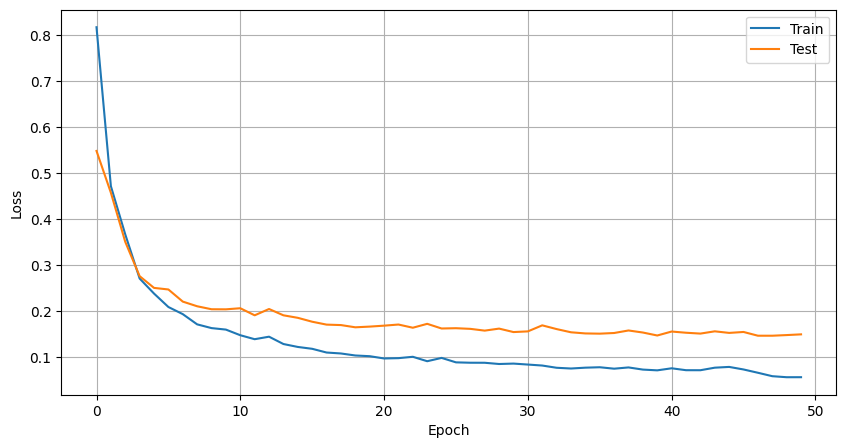

>>> Saving the trained model
>>> Model saved successfully
>>> Loading the trained model
>>> Model loaded successfully


Running HMC:   0%|          | 0/512 [00:00<?, ?it/s]

>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!


Running HMC:  12%|█▏        | 63/512 [00:27<00:42, 10.67it/s] 

>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!


Running HMC:  25%|██▍       | 127/512 [01:05<00:36, 10.51it/s]

>>> Warning: Invalid values detected of the log det Jacobian!


Running HMC:  37%|███▋      | 191/512 [01:20<00:30, 10.48it/s]

>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!


Running HMC:  75%|███████▌  | 384/512 [02:47<00:13,  9.45it/s]

>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!
>>> Warning: Invalid values detected of the log det Jacobian!


Running HMC: 100%|██████████| 512/512 [03:41<00:00,  2.31it/s]


>>> Simulation completed


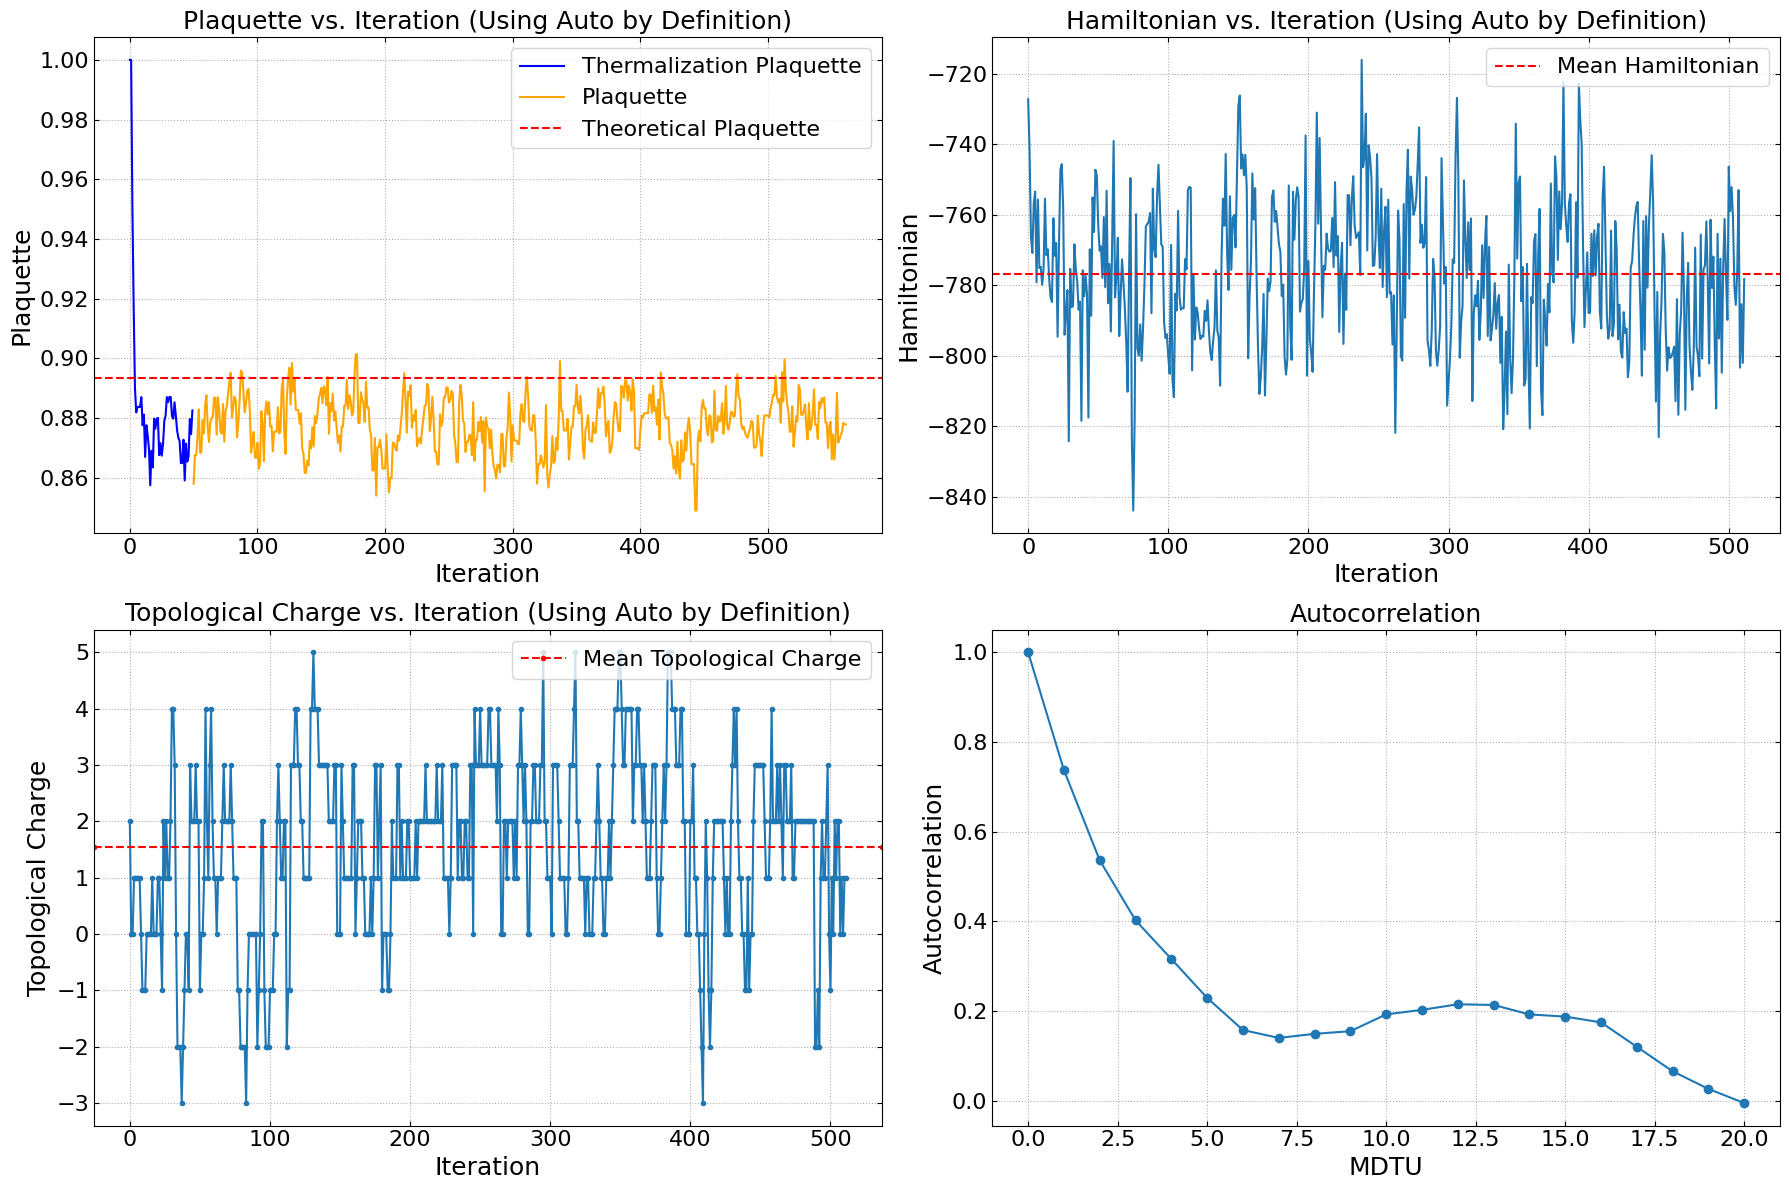

>>> Theoretical plaquette:  0.8933831370440852
>>> Mean plaq:  0.8781390382209793
>>> Std of mean plaq:  0.0003932000213121025
Thermalization acceptance rate: 0.9000
Acceptance rate: 0.8867


In [4]:
print(">>> Neural Network Field Transformation HMC Simulation: ")

# initialize the field transformation
nn_ft = FieldTransformation(lattice_size, device=device)
# nn_ft.model.load_state_dict(torch.load('models/cnn_save.pt'))

# load the data
data = np.load('dump/theta_ori.npy')
tensor_data = torch.from_numpy(data).float().to(device)
print(f"Loaded data shape: {tensor_data.shape}")

# split the data into training and testing
train_size = int(0.5 * len(tensor_data))
train_data = tensor_data[:train_size]
test_data = tensor_data[train_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# train the model
print(">>> Training the model")
nn_ft.train(train_data, test_data, beta, n_epochs=50, batch_size=4)

# Save the trained model
print(">>> Saving the trained model")
torch.save(nn_ft.model.state_dict(), 'models/cnn_trained.pt')
print(">>> Model saved successfully")


# Load the trained model
print(">>> Loading the trained model")
nn_ft.model.load_state_dict(torch.load('models/cnn_trained.pt'))
nn_ft.model.eval()
print(">>> Model loaded successfully")


field_transformation = nn_ft.field_transformation

# Initialize HMC with field transformation
n_thermalization_steps = 50
hmc = HMC_U1_FT(lattice_size, beta, n_thermalization_steps, n_steps, step_size, field_transformation=field_transformation, jacobian_interval=64, device=device)

# Thermalize the system
theta_thermalized, therm_plaq_ls, therm_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, plaq_ls, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

print(">>> Simulation completed")


# Compute autocorrelation of topological charges
max_lag = 20
hmc_summary(beta, max_lag, volume, therm_plaq_ls, plaq_ls, topological_charges, hamiltonians, therm_acceptance_rate, acceptance_rate)

In [7]:
from utils import plaq_mean_theory
print( plaq_mean_theory(4.4) )

0.8773166298722289
